In [19]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import sys
import time
import pytorch_lightning as pl
import torchvision
import random
from scipy.spatial.distance import cdist, directed_hausdorff
sys.path.append(os.path.join(os.getcwd(), "src"))
#from utils import *
from skimage import exposure
from Models.unet import UNet
from Datasets.DSB18 import Nuclie_datamodule
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:

# intialize the dataloaders
datamodule = Nuclie_datamodule()

train_loader = datamodule.train_dataloader()
#val_loader = datamodule.val_dataloader()
batch_x, batch_y = next(iter(train_loader))


0.0


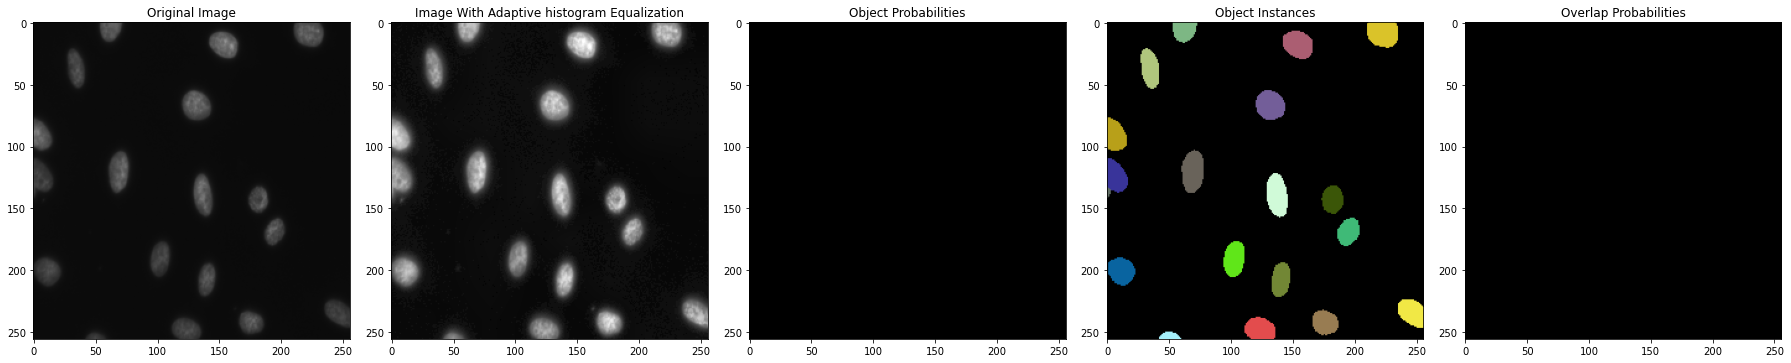

1.0


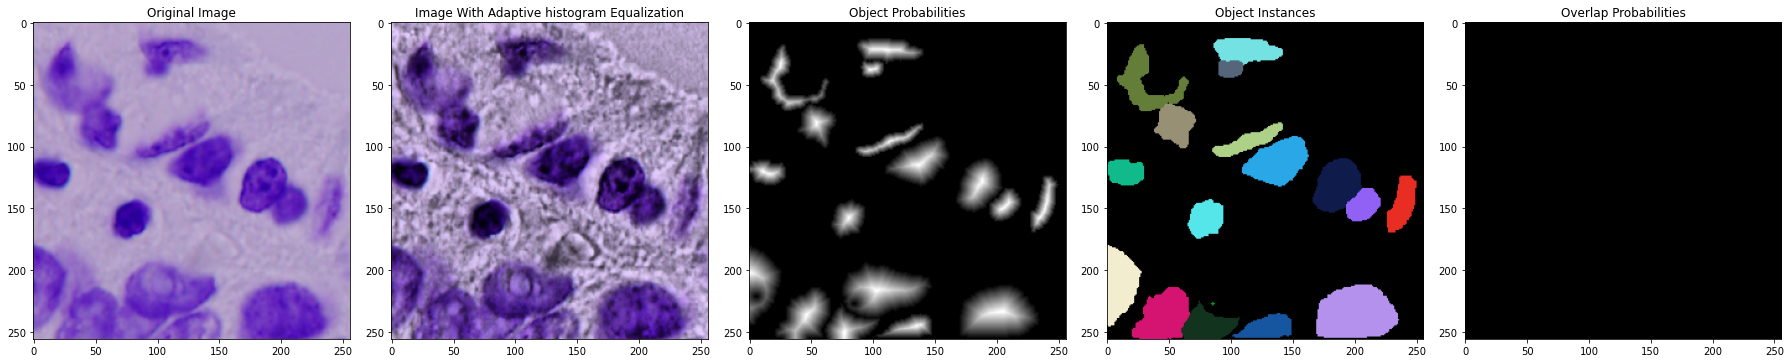

1.0


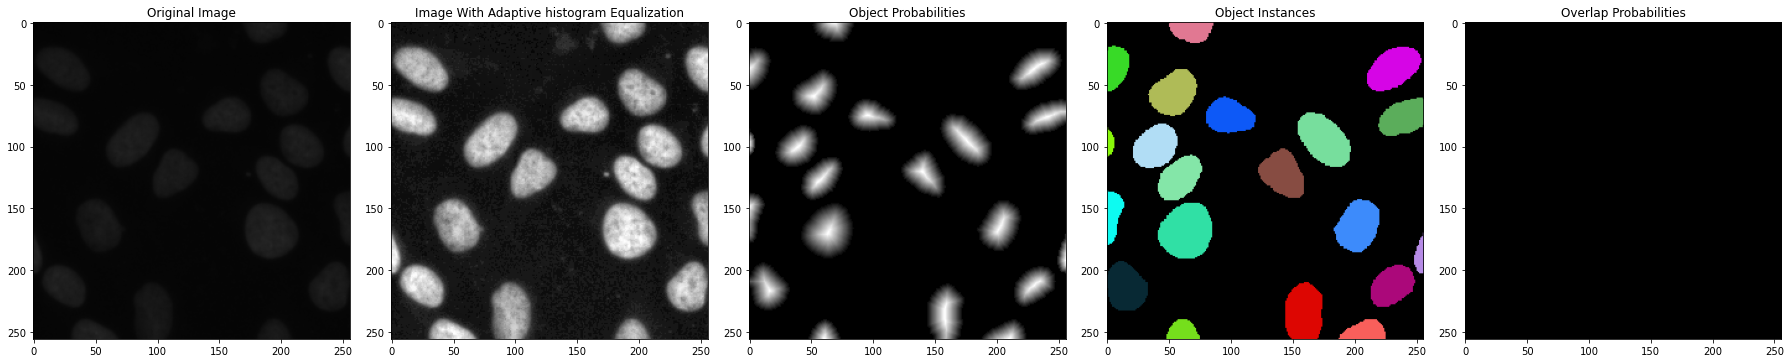

1.0


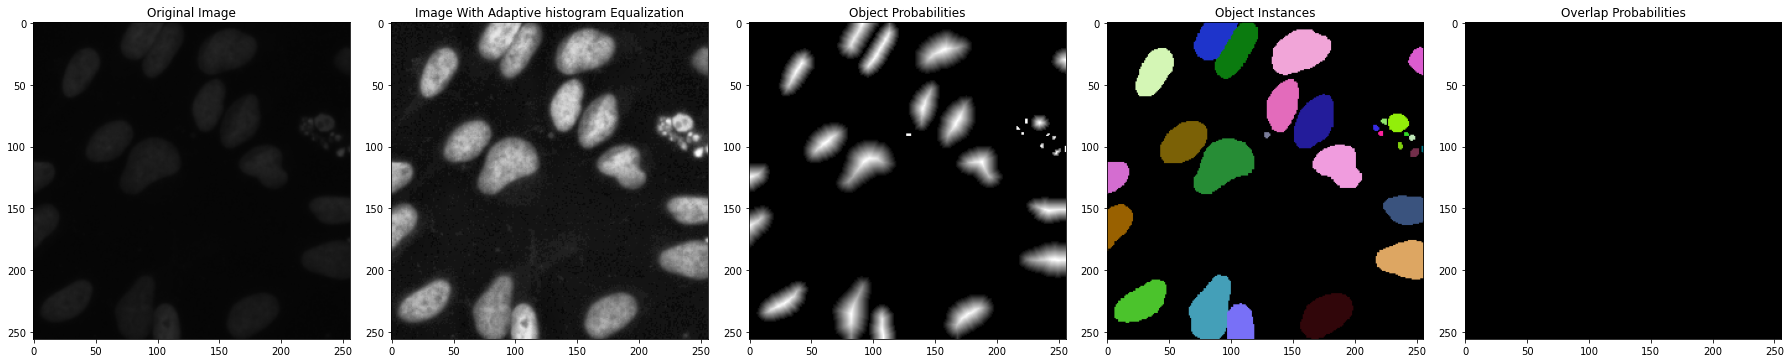

1.0


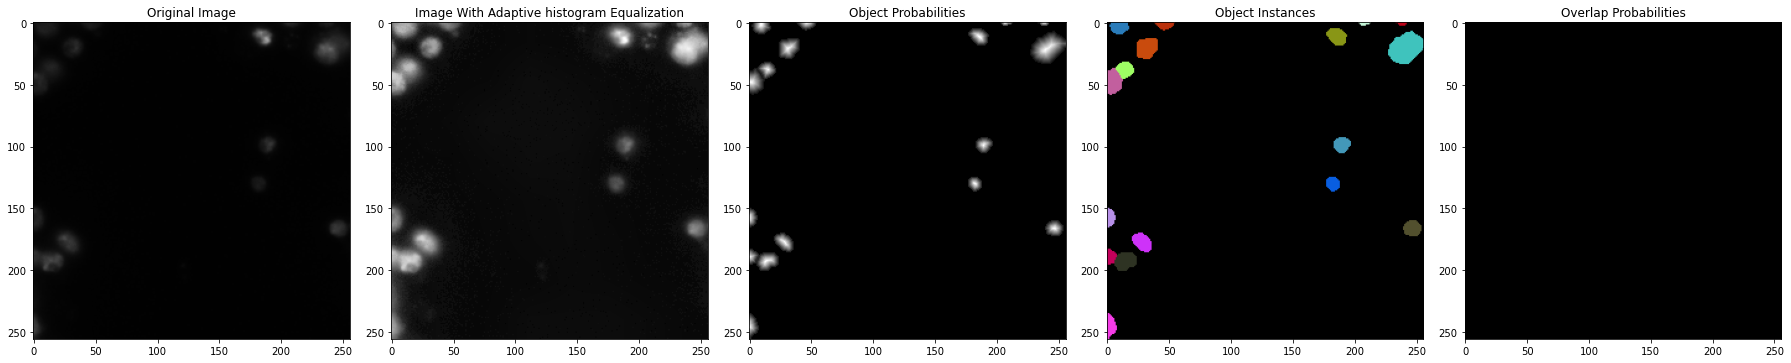

1.0


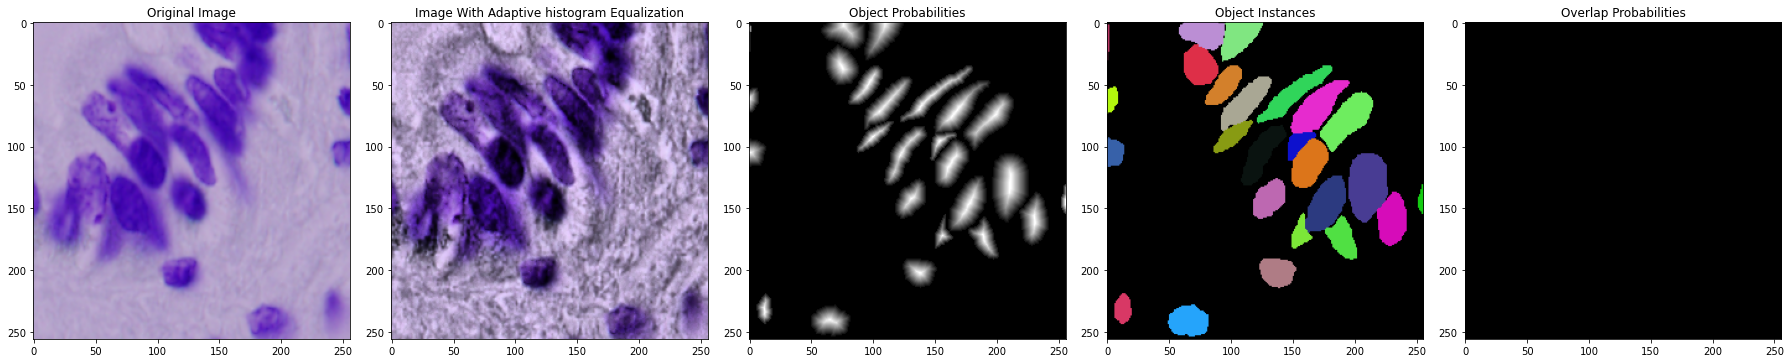

1.0


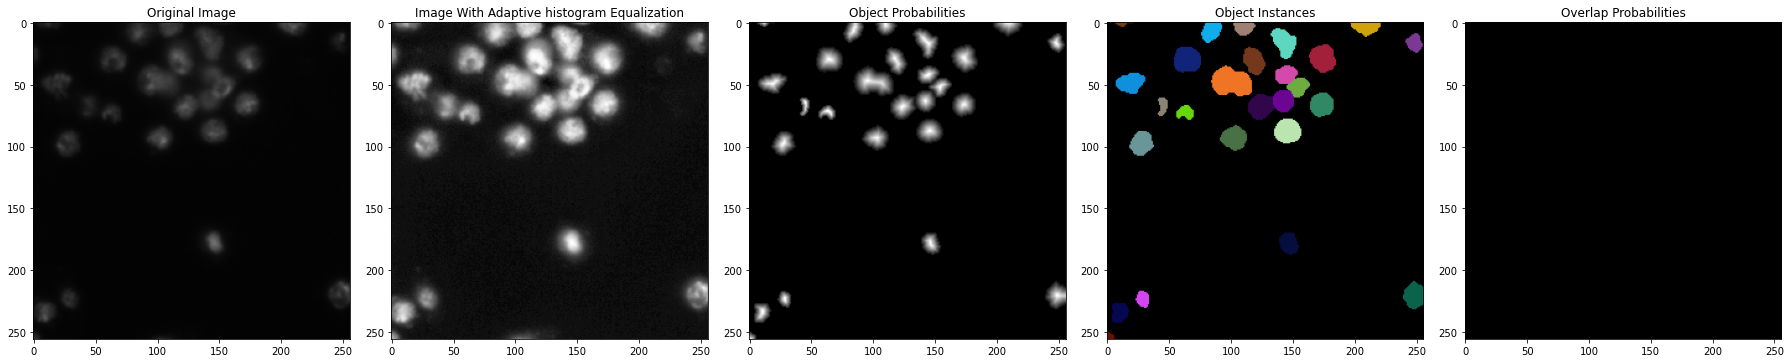

1.0


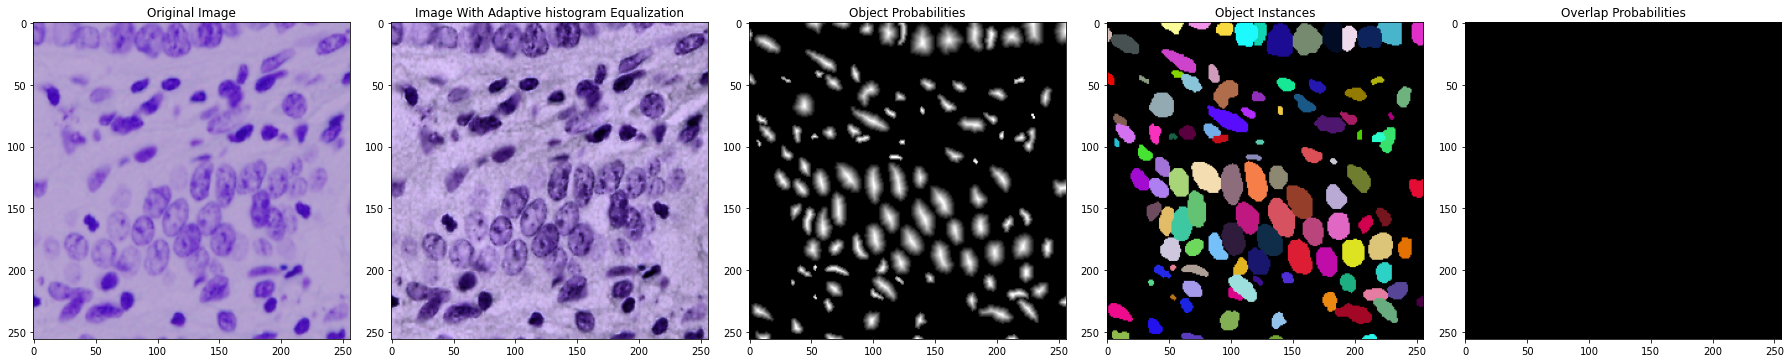

0.0


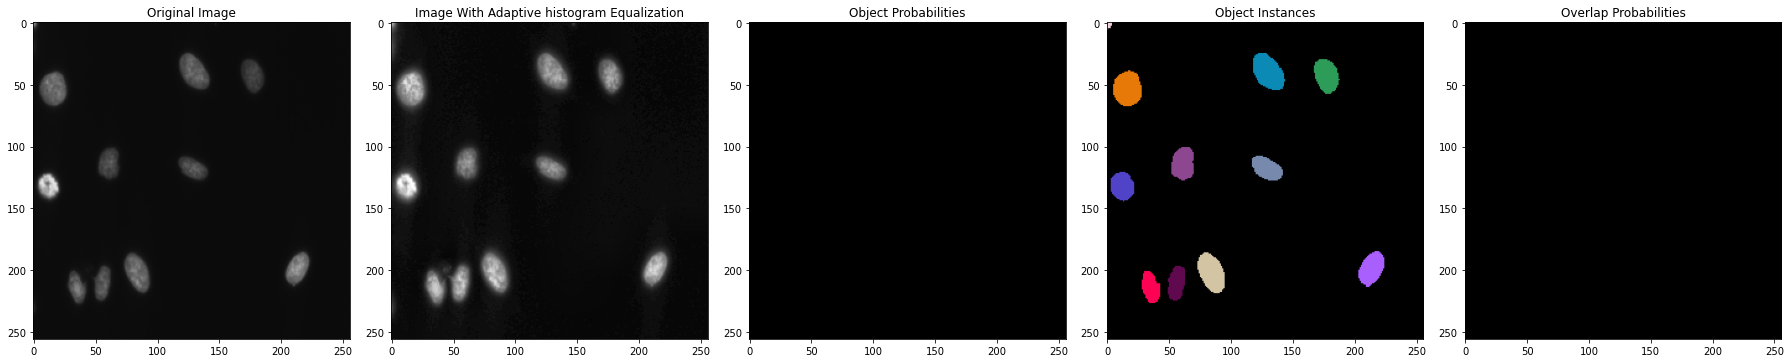

1.0


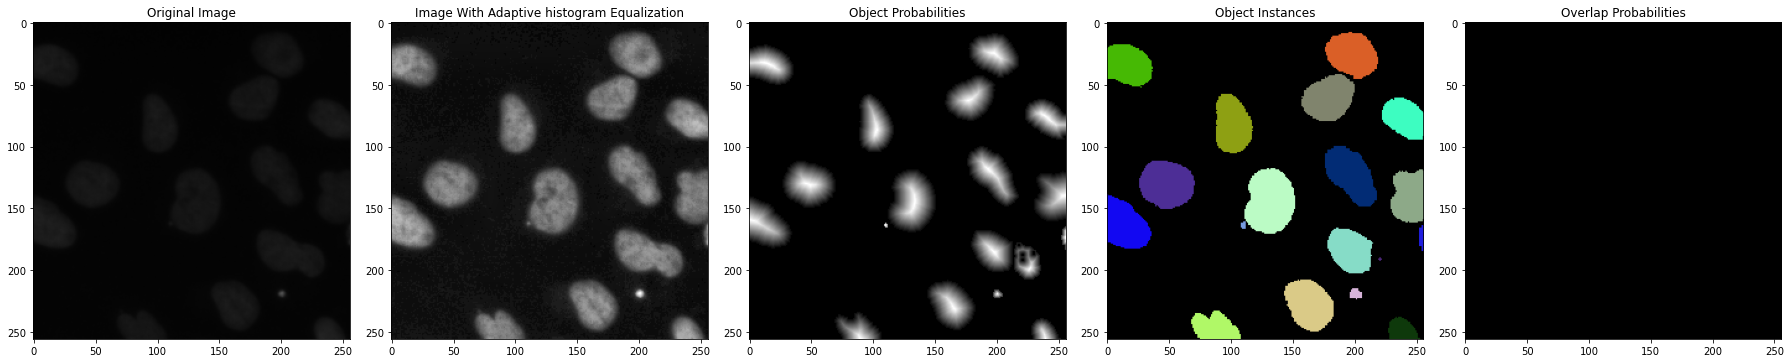

1.0


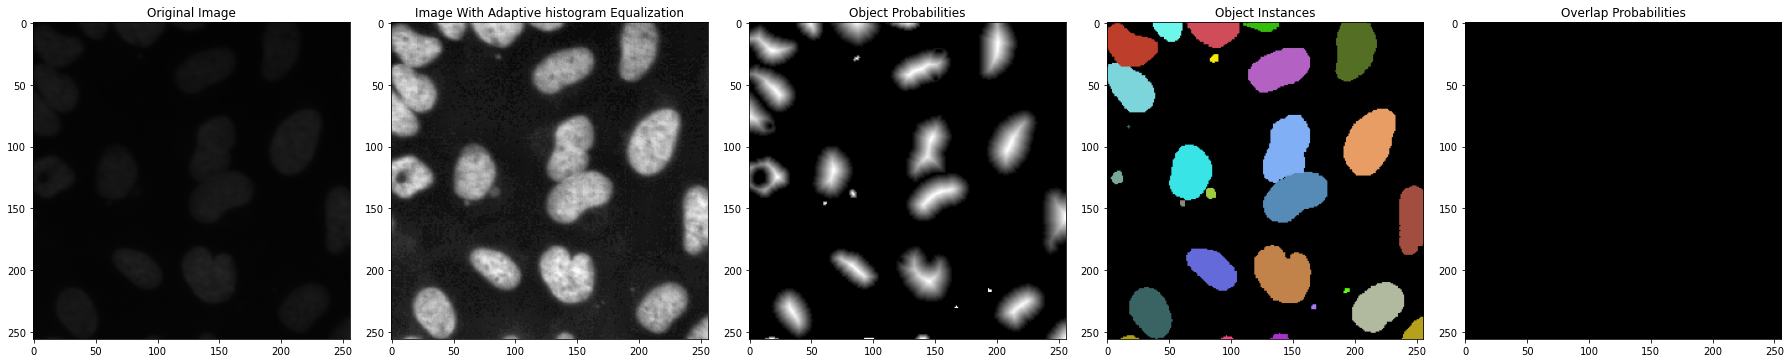

1.0


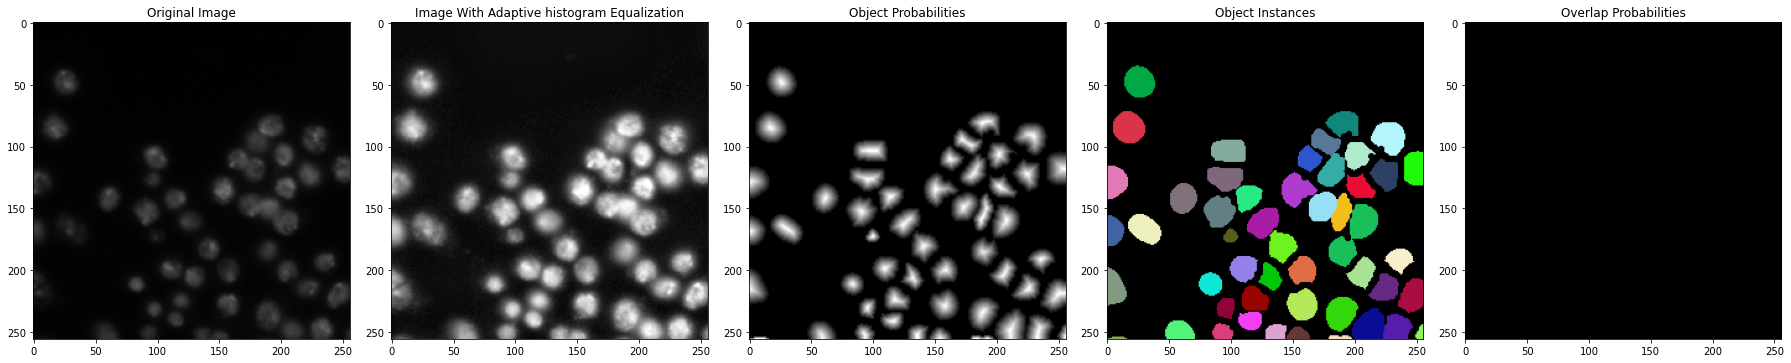

1.0


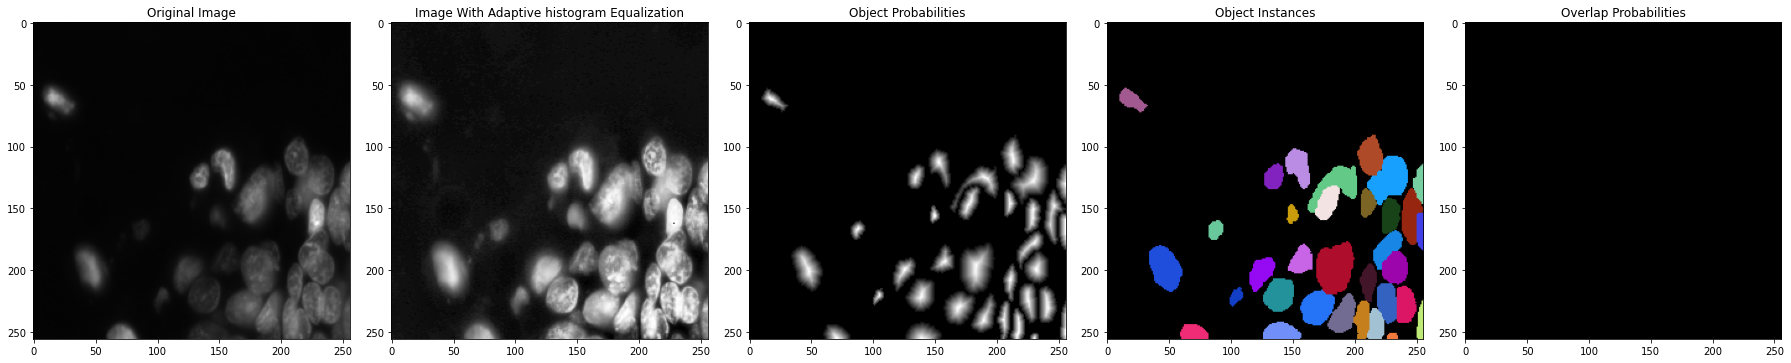

0.0


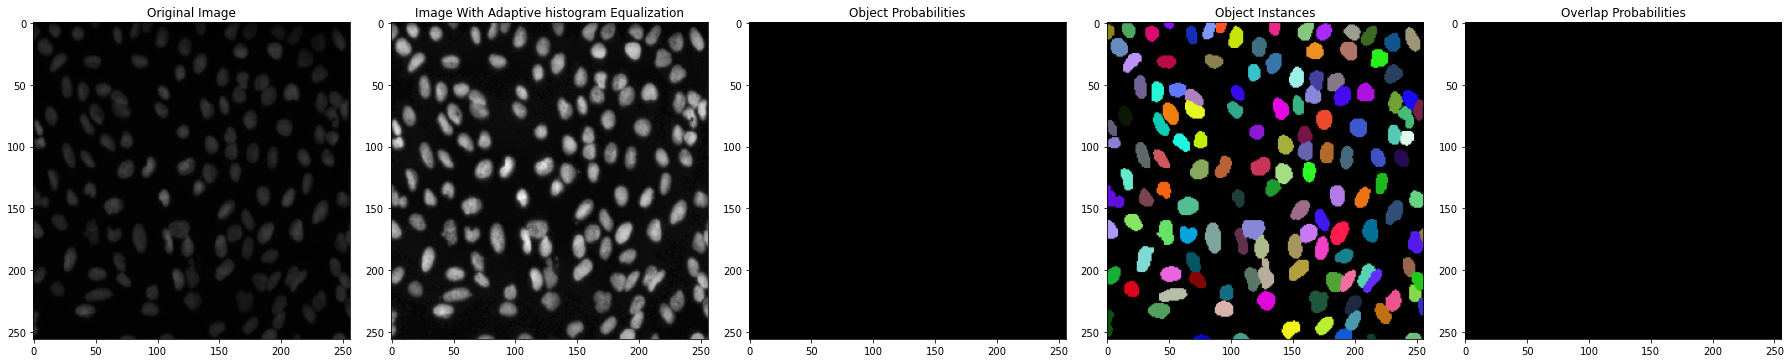

1.0


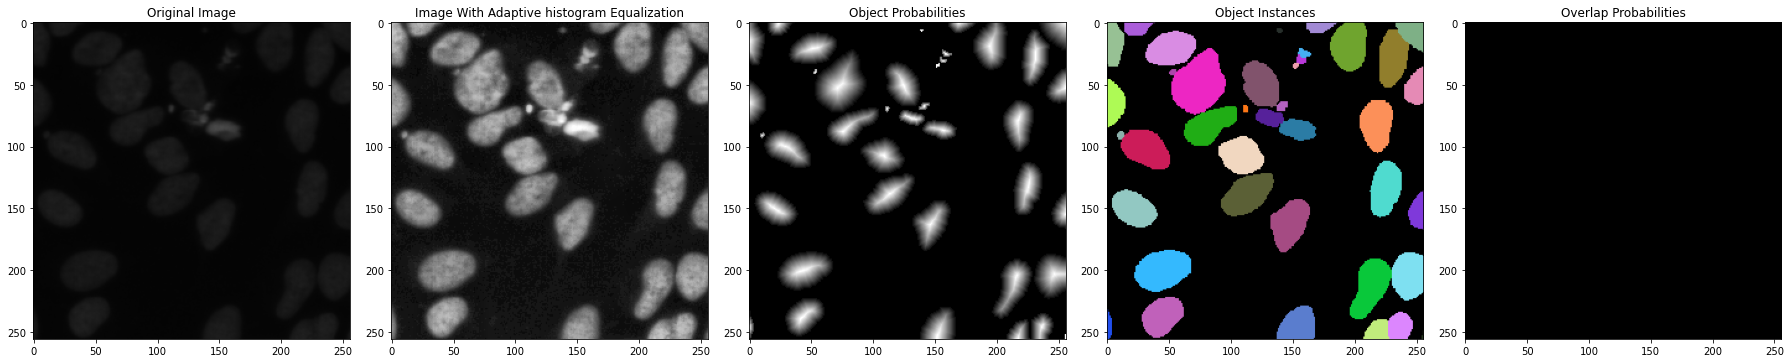

0.0


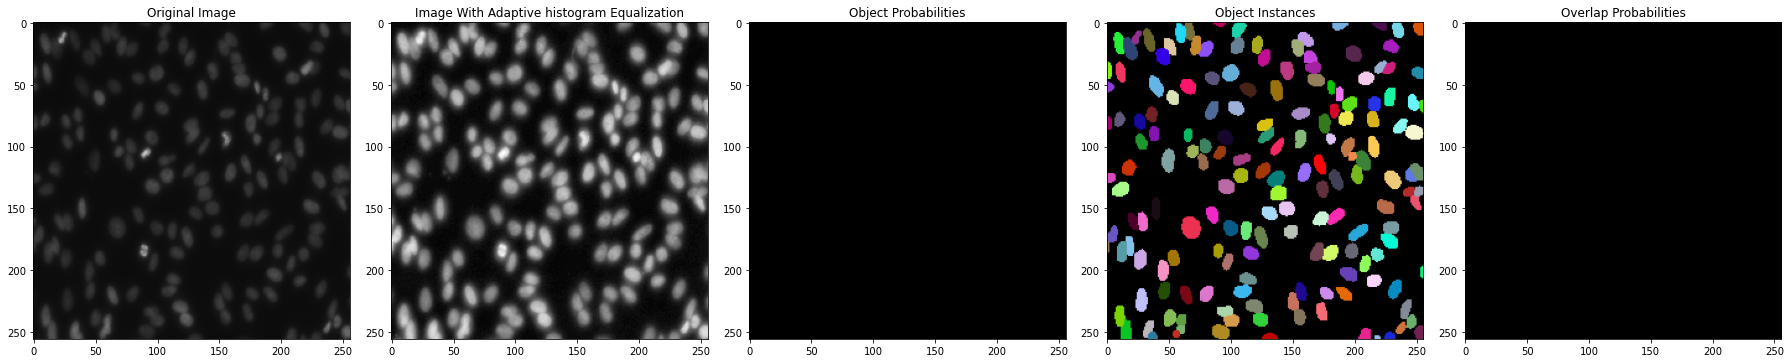

1.0


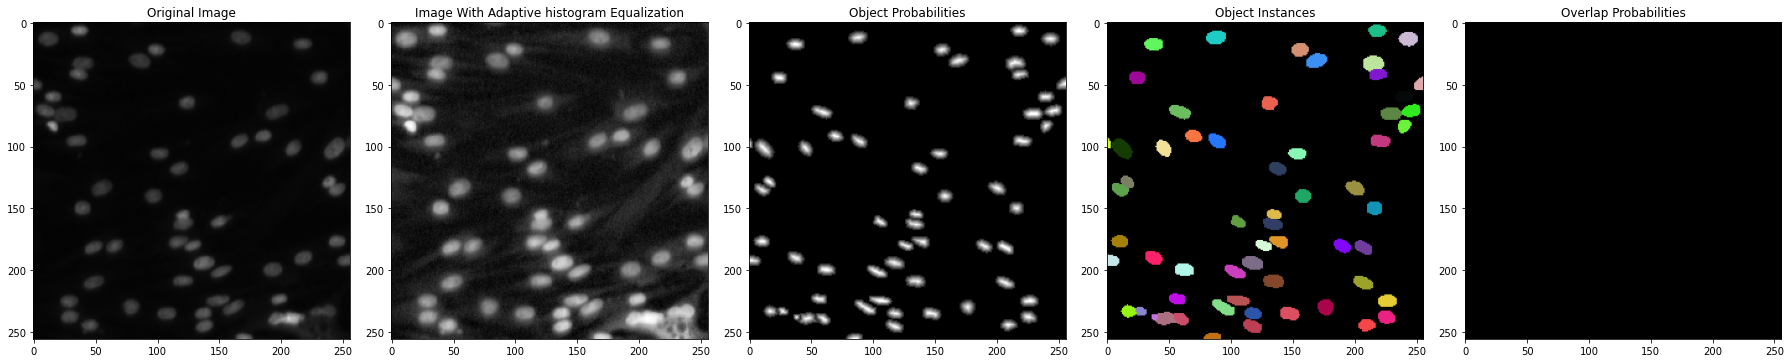

1.0


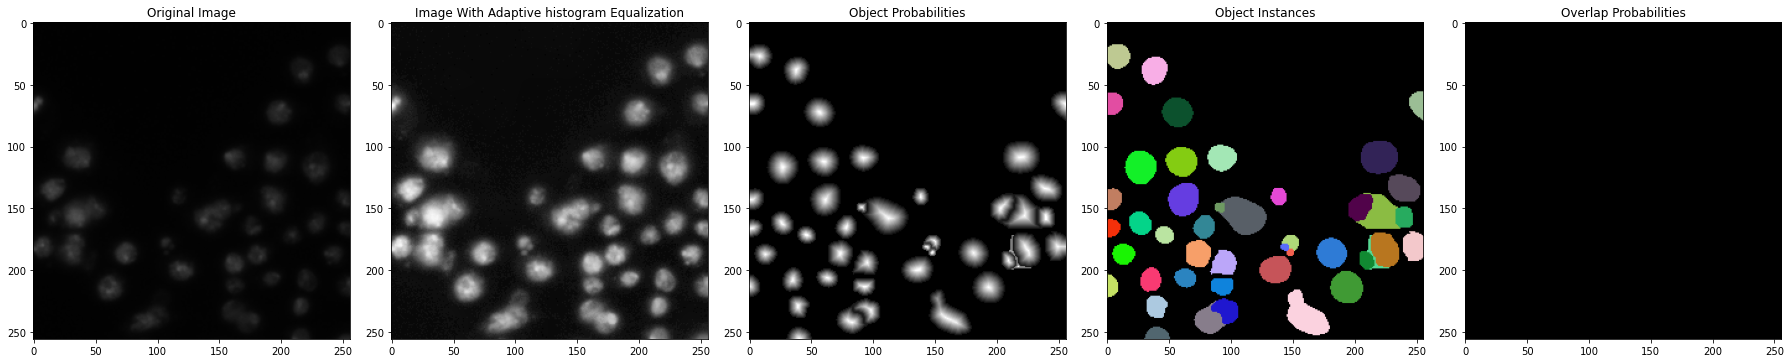

1.0


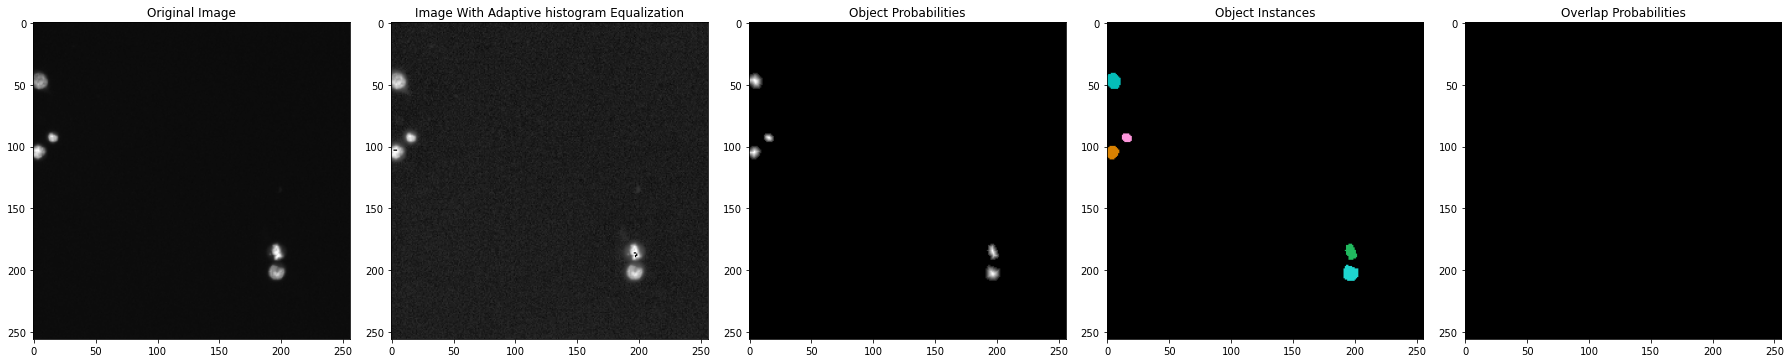

1.0


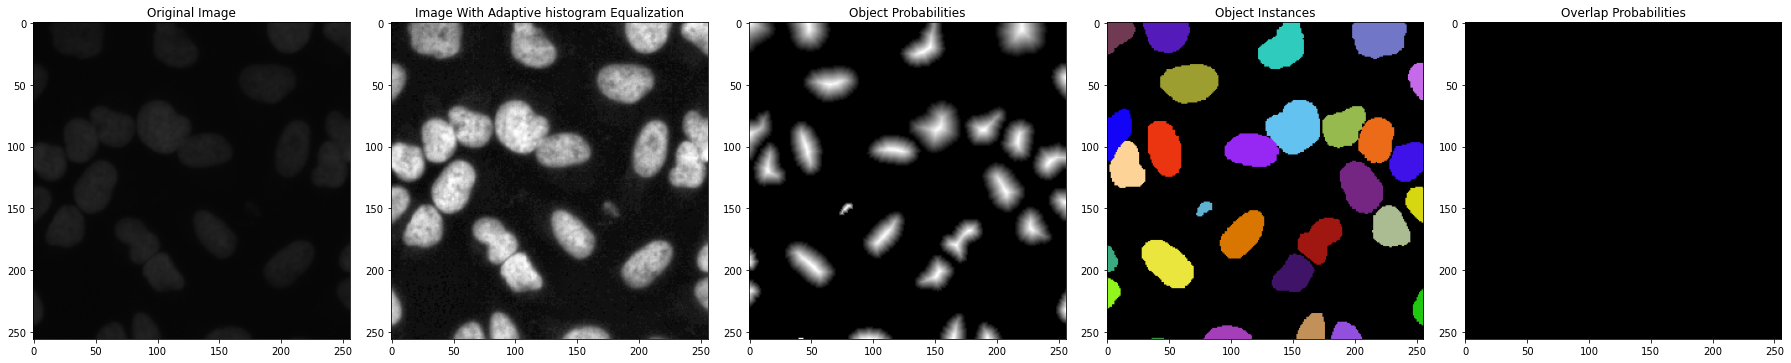

1.0


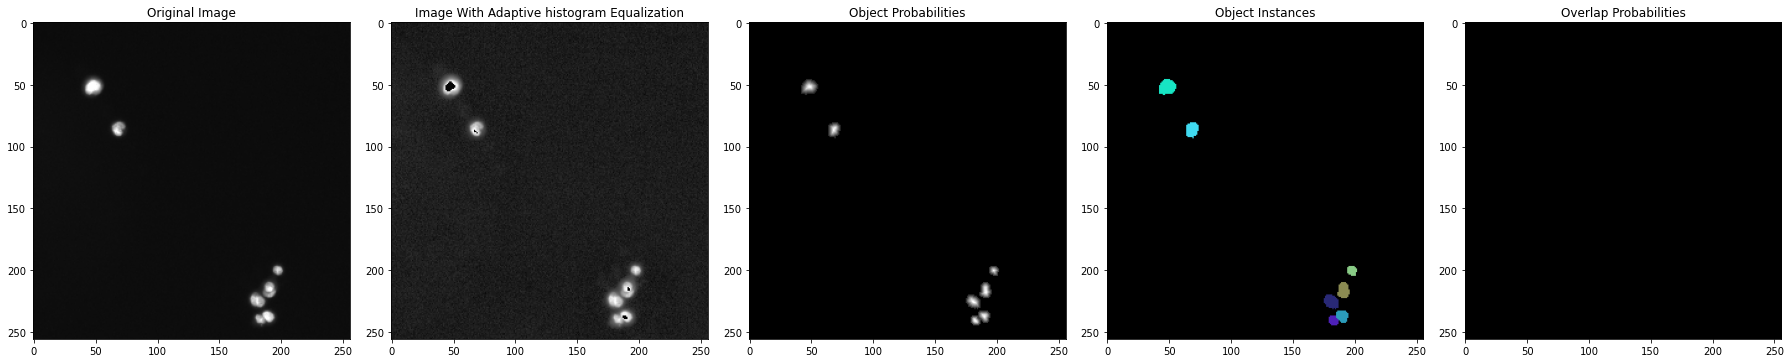

1.0


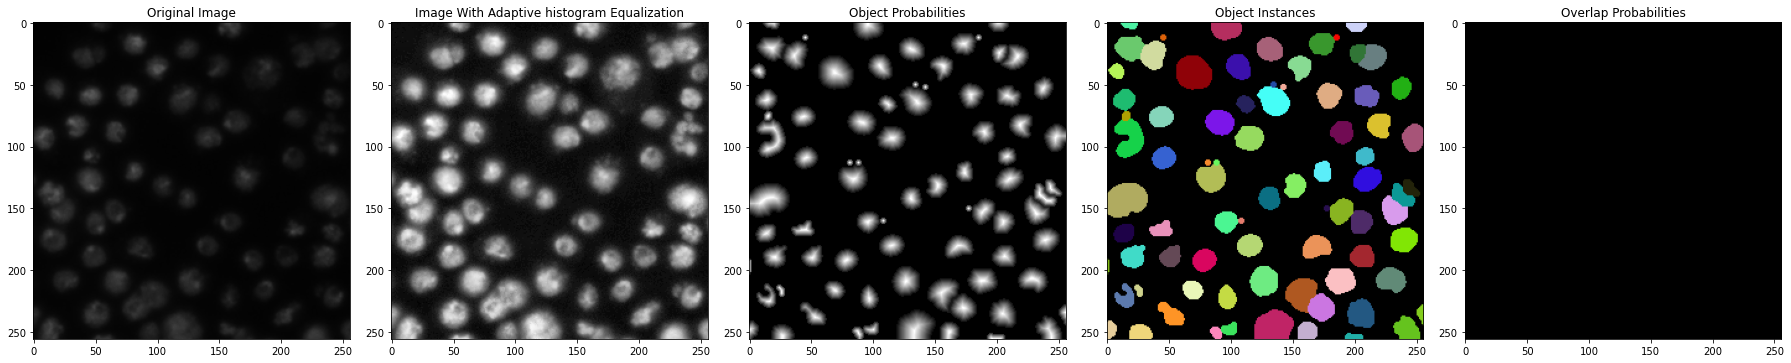

1.0


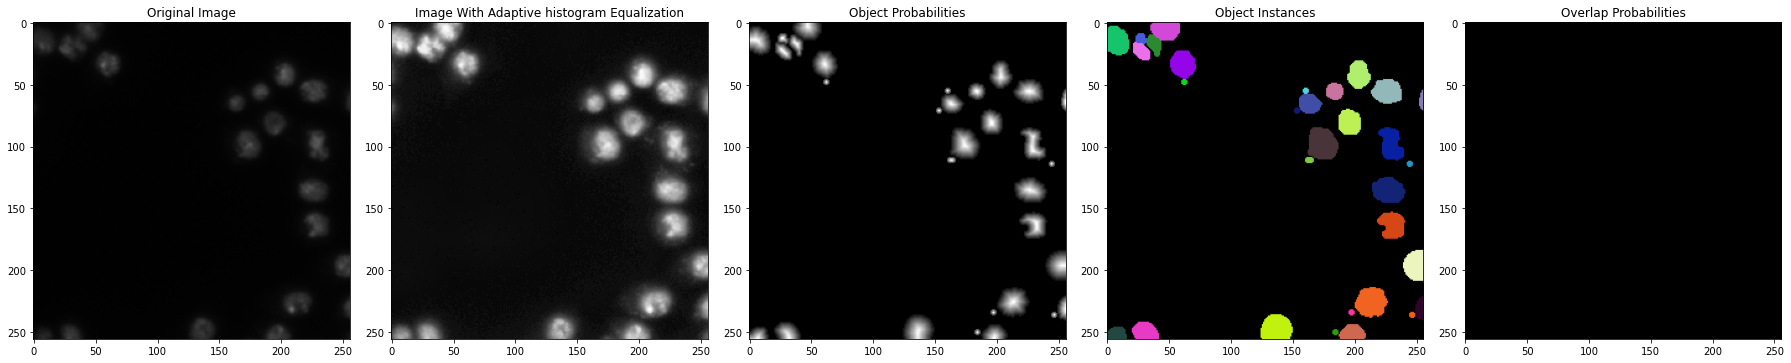

0.0


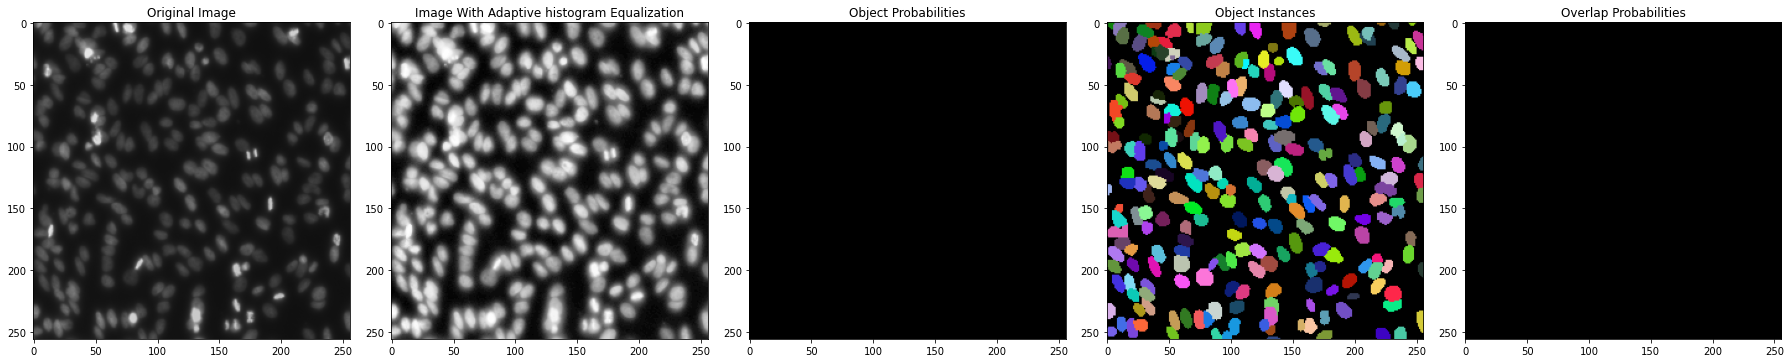

0.0


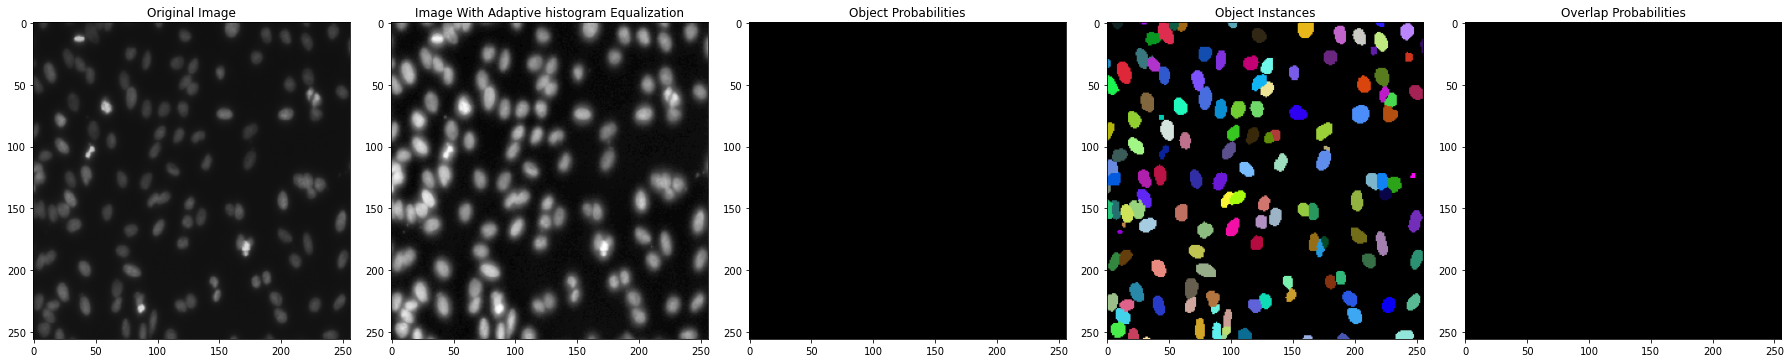

1.0


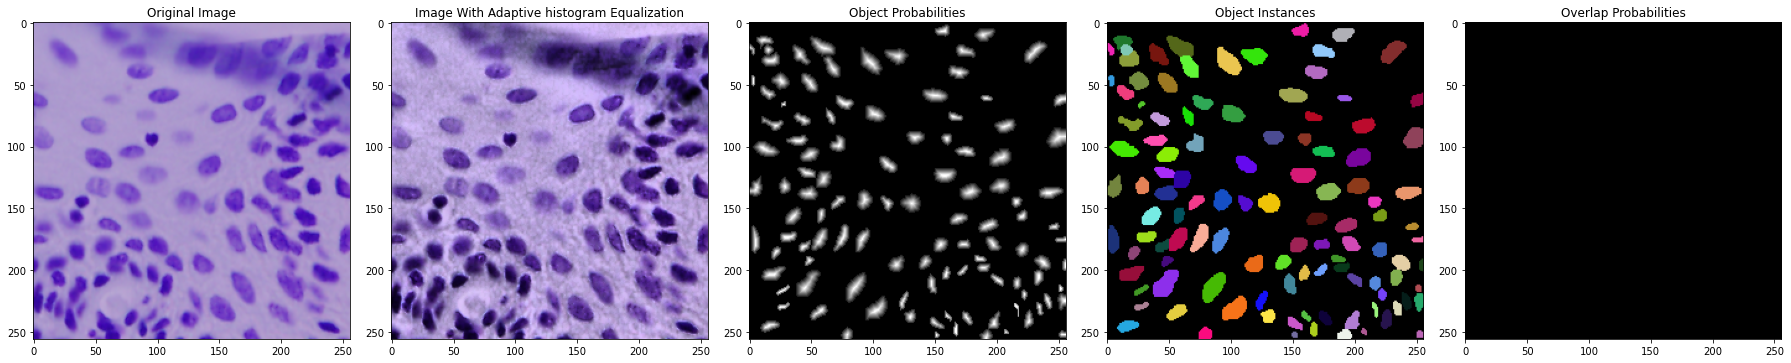

1.0


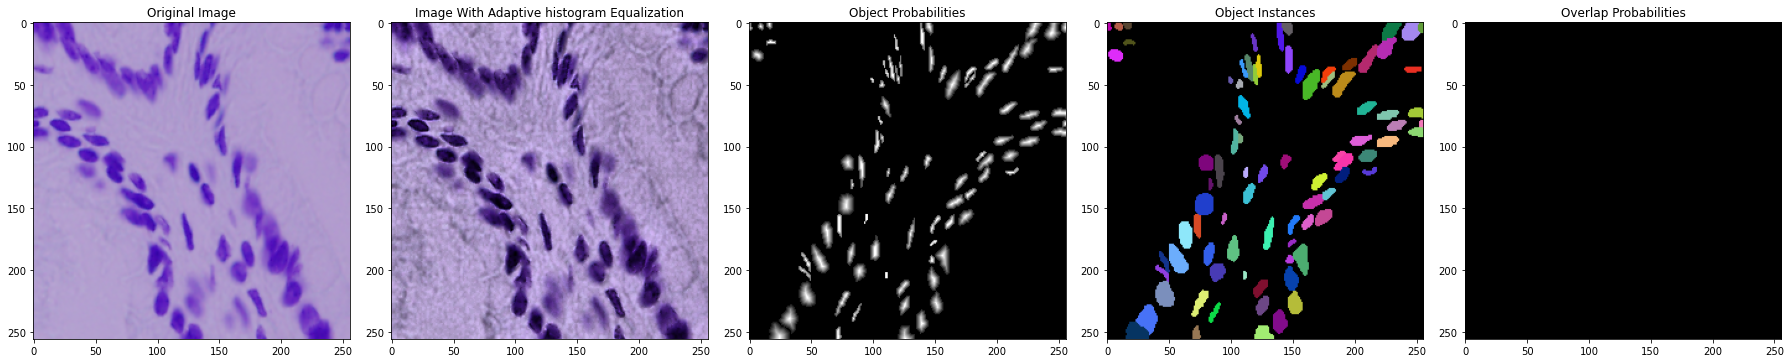

1.0


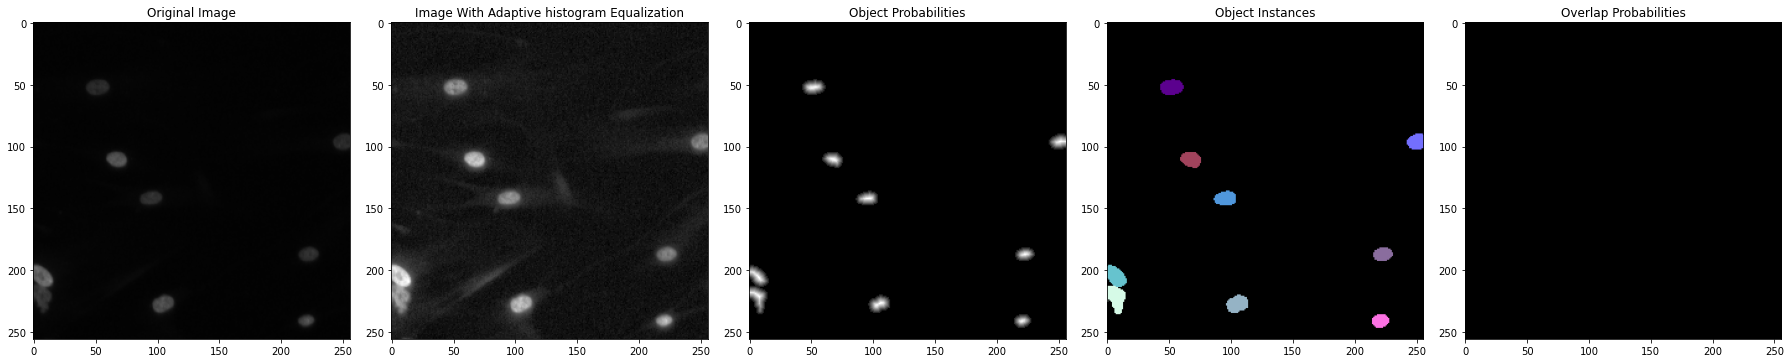

1.0


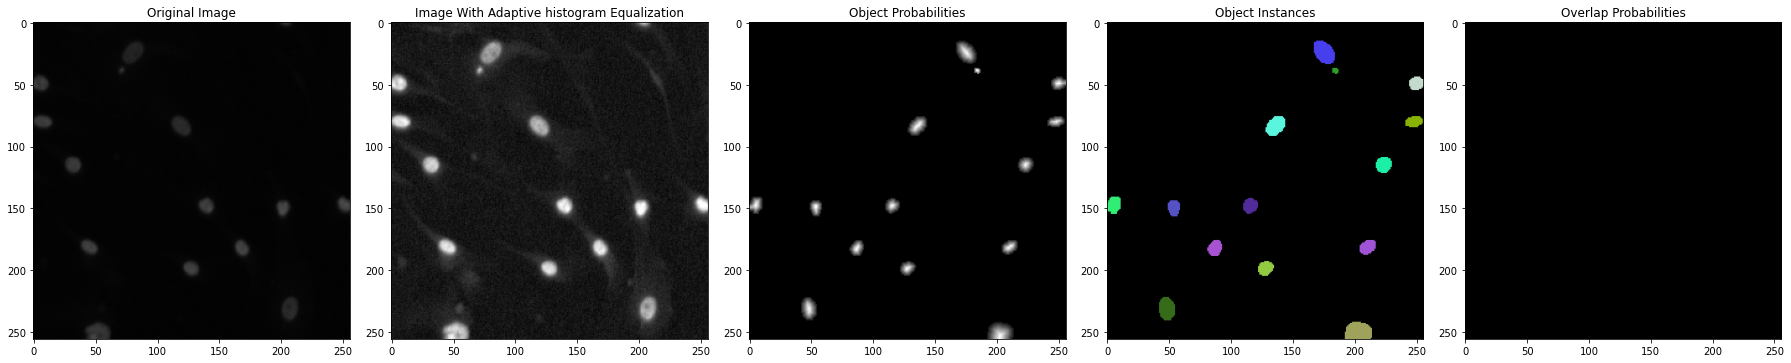

1.0


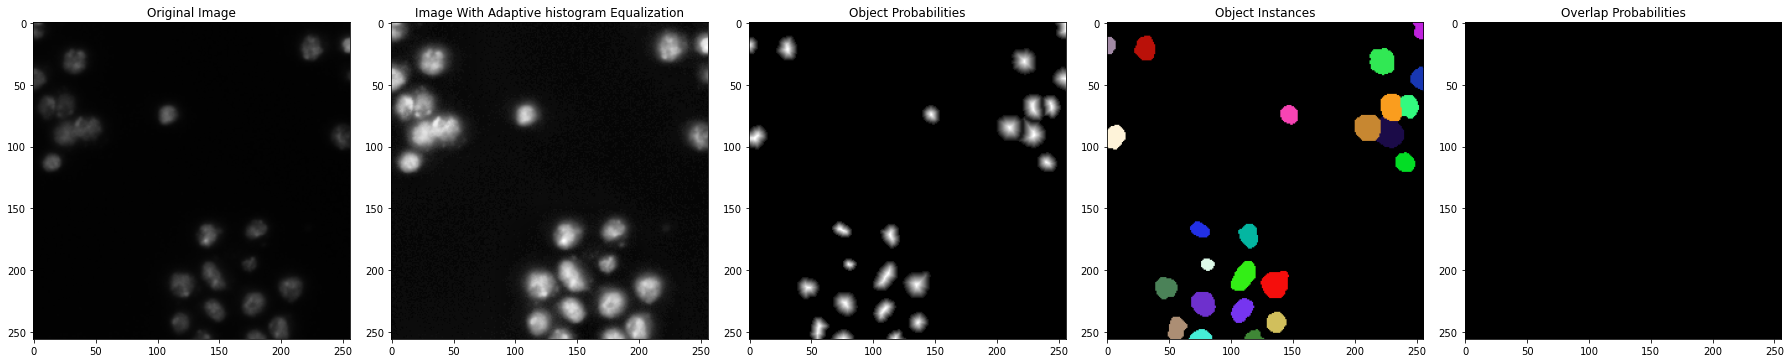

1.0


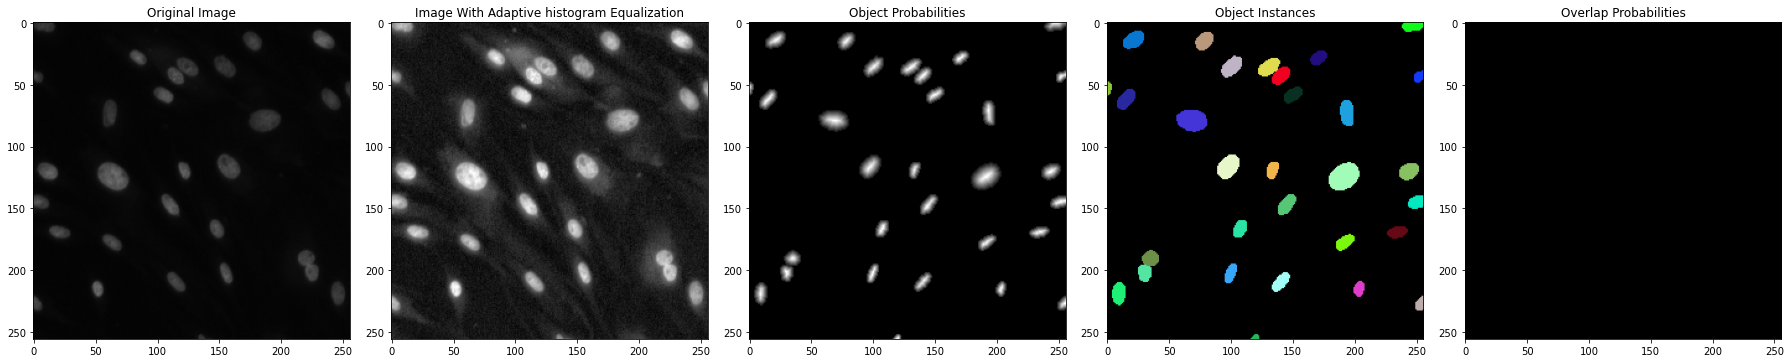

1.0


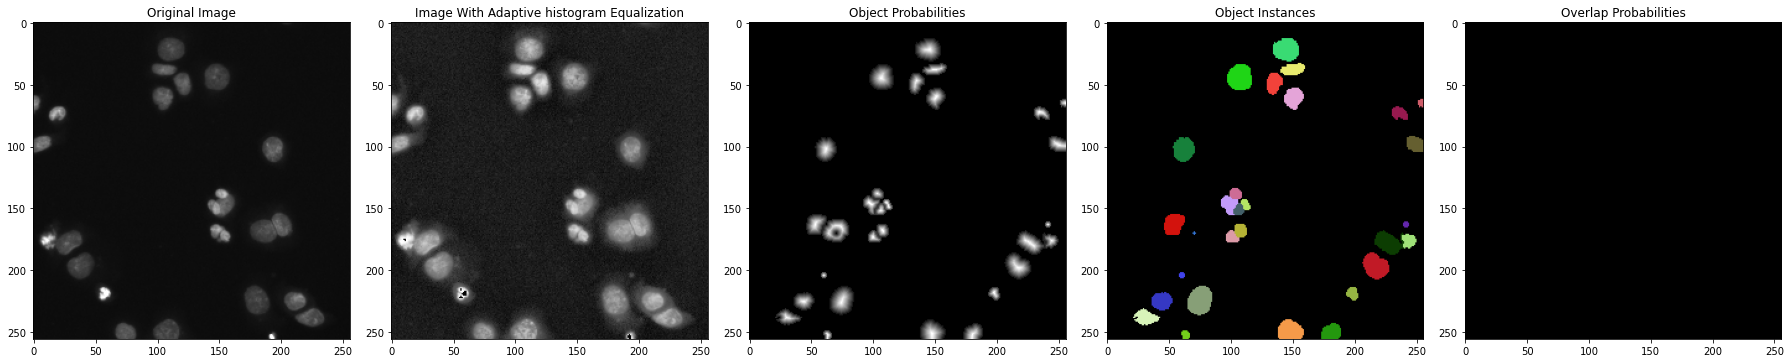

In [29]:
def denormalize(x):
    mean, std = 0.5, 0.5
    std_inv = 1 / (std + 1e-7)
    mean_inv = -mean * std_inv
    x = torchvision.transforms.Normalize(mean=mean_inv, std=std_inv)(x)
    x = x.clamp(0, 1)
    return x

def getObjectInstanceFromContours(contours):
    image = np.zeros((img.shape[1],img.shape[2], 3), dtype=np.uint8)
    for contour in objectContours:
        color = np.random.randint(0, 255, size=3)
        color = ( int(color [0]), int(color [1]), int(color [2]))
        cv2.fillPoly(image, pts=[contour], color=color)
    return image

for item in range(len(batch_x)):

    img = batch_x[item]

    (objectProbas, overlapProba, objectContours, mask, masks) = batch_y[item].values()

    # plt.figure(figsize=(20, 10))
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(25, 5))

    #plt.subplot(1,4,1)
    ax1.set_title("Original Image")
    ax1.imshow(denormalize(img).permute(1,2,0).clamp(0,1))

    ax2.set_title("Image With Adaptive histogram Equalization")
    eq = exposure.equalize_adapthist((denormalize(img).permute(1,2,0).clamp(0,1).numpy()*256).astype(np.uint8), clip_limit=0.03)
    ax2.imshow(eq)
    #plt.subplot(1,4,2)
    ax3.set_title("Object Probabilities")
    ax3.imshow(objectProbas.clip(0, 1), cmap='gray')
    print(objectProbas.max())
    #ax2.hist(objectProbas[objectProbas > 0].flatten(), bins=100)
    #plt.subplot(1,4,3)
    ax5.set_title("Overlap Probabilities")
    ax5.imshow(overlapProba.clip(0, 1), cmap='gray')
    #show overlap histogram
    #ax3.hist(overlapProba.flatten(), bins=100)

    #plt.subplot(1,4,4)
    ax4.set_title("Object Instances")
    instances = getObjectInstanceFromContours(objectContours)
    ax4.imshow(instances)

    fig.tight_layout()
    plt.show()

2.0